Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier).
A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
df= pd.read_csv('breast_data.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

### Data Understanding
- ID- clump thickness
- Clump- 
- UnifSize- uniformity of cell size
- UnifShape- uniformity of cell shape
- MargAdh - marginal adhesion
- SingEpiSize-Single epithelial cell size
- BareNuc - Bare nuclei
- BlandChrom- Bland chromatin
- NormNucl- Normal nucleoli
- Mit- Mitoses
- Class- Target variable (2 = Benign, 4 = Malignant)

In [4]:
df.shape

(699, 11)

In [5]:
df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [6]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
df['BareNuc']= pd.to_numeric(df['BareNuc'], errors= 'coerce')

In [9]:
df.dtypes

ID               int64
Clump            int64
UnifSize         int64
UnifShape        int64
MargAdh          int64
SingEpiSize      int64
BareNuc        float64
BlandChrom       int64
NormNucl         int64
Mit              int64
Class            int64
dtype: object

In [10]:
df[df['BareNuc'].isna()]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [11]:
df = df.dropna(subset=['BareNuc'])

In [12]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [13]:
df.shape

(683, 11)

In [14]:
df['Class'].unique()

array([2, 4], dtype=int64)

In [15]:
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

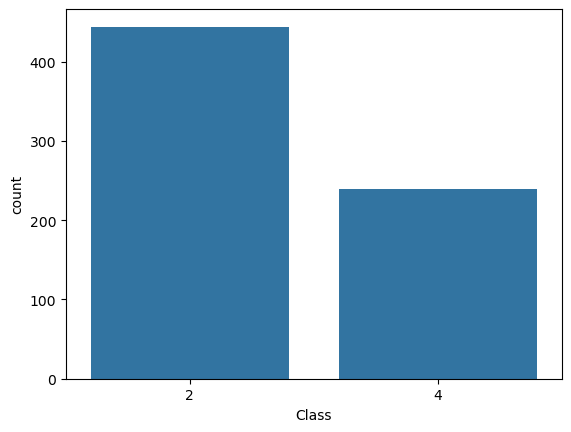

In [16]:
#Distribution of target variable
sns.countplot(df, x='Class')

In [17]:
df= df.drop('ID', axis=1)

In [18]:
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [19]:
# Convert target labels: 2 = Benign (0), 4 = Malignant (1)
df['Class'] = df['Class'].map({2: 0, 4: 1})

In [20]:
df['Class']

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 683, dtype: int64

In [21]:
#Target selection
# Features (inputs)
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 
        'SingEpiSize', 'BareNuc', 'BlandChrom', 
        'NormNucl', 'Mit']]
y = df['Class']

#### Split into training and test data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the features

In [24]:
#SVM works best when data is standardized (mean = 0, std = 1).
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
print(X_train.shape)  
print(X_test.shape)   

(546, 9)
(137, 9)


### Modelling

##### SVM(Support Vector Machine)

In [28]:
svm_model= SVC(kernel='rbf', random_state=42)

In [29]:
svm_model.fit(X_train_scaled,y_train)

SVC(random_state=42)

- The .predict() method of an SVC (or any scikit-learn model) only takes one argument: the features (X) you want to predict on

In [30]:
# predicting values
y_pred_test= svm_model.predict(X_test_scaled)
y_pred_train= svm_model.predict(X_train_scaled)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score

In [32]:
## performance evaluation
cm = confusion_matrix(y_test,y_pred_test )
cm

array([[77,  2],
       [ 3, 55]], dtype=int64)

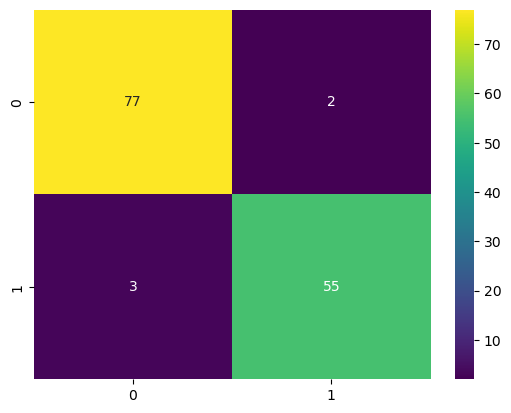

In [33]:
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()

- The classifier correctly identified most samples.

- Only 2 false positives (class 0 misclassified as 1) and 3 false negatives (class 1 misclassified as 0).

In [34]:
accuracy= accuracy_score(y_test, y_pred_test)
print(accuracy)

0.9635036496350365


In [35]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        79
           1       0.96      0.95      0.96        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



In [36]:
print("Number of support vectors for each class:", svm_model.n_support_)

Number of support vectors for each class: [27 51]


In [37]:
svm_model.support_

array([ 37,  49,  92, 108, 117, 124, 142, 163, 171, 197, 211, 232, 239,
       260, 266, 276, 280, 300, 302, 316, 326, 337, 360, 417, 421, 469,
       482,   7,   8,  31,  33,  71,  73,  77,  97, 100, 107, 115, 132,
       133, 138, 159, 168, 174, 182, 186, 196, 199, 201, 229, 278, 283,
       291, 292, 303, 320, 325, 335, 348, 357, 366, 383, 396, 407, 423,
       425, 430, 435, 439, 465, 475, 501, 513, 514, 526, 531, 540, 545])

In [38]:
y_prob = svm_model.decision_function(X_test_scaled)  # use decision_function for SVM
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)

0.9973810563072895


In [39]:
from sklearn.metrics import roc_curve, auc

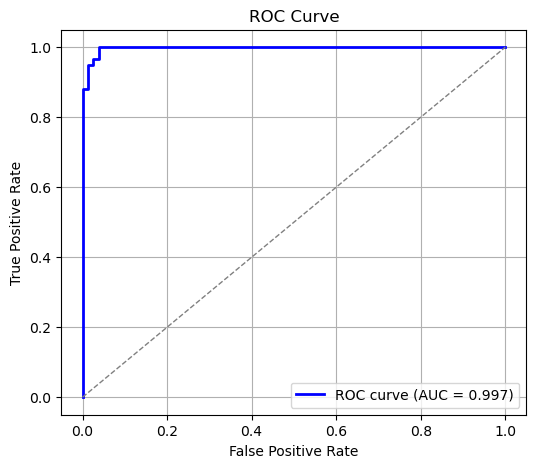

In [40]:
# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
#auc() → Calculates the Area Under the Curve (AUC), which tells you how good your ROC curve is
# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [41]:
print(roc_curve(y_test, y_prob))

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01265823, 0.01265823, 0.02531646, 0.02531646, 0.03797468,
       0.03797468, 0.15189873, 0.17721519, 0.25316456, 0.35443038,
       0.37974684, 0.49367089, 0.5443038 , 0.56962025, 0.59493671,
       0.67088608, 0.69620253, 0.73417722, 0.75949367, 0.81012658,
       0.83544304, 0.84810127, 0.88607595, 0.89873418, 0.97468354,
       1.        ]), array([0.        , 0.01724138, 0.56896552, 0.60344828, 0.87931034,
       0.87931034, 0.94827586, 0.94827586, 0.96551724, 0.96551724,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ]), array([        inf,  1.35622838,  0.99644074,  0.99479853,  0.60026976,
        0.53572664,  0.14319168,  0.06806064, -0.33843429, -0.42111572,
       -0

In [42]:
print(auc(fpr, tpr))

0.9973810563072895


The curve hugs the top-left corner, meaning the model achieves very high true positive rates while maintaining very low false positive rates. 
This indicates the model can correctly distinguish between the two classes with excellent accuracy.

In [43]:
# Add this after your model evaluation (after ROC curve)

from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(
    svm_model, 
    X_test_scaled, 
    y_test, 
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)



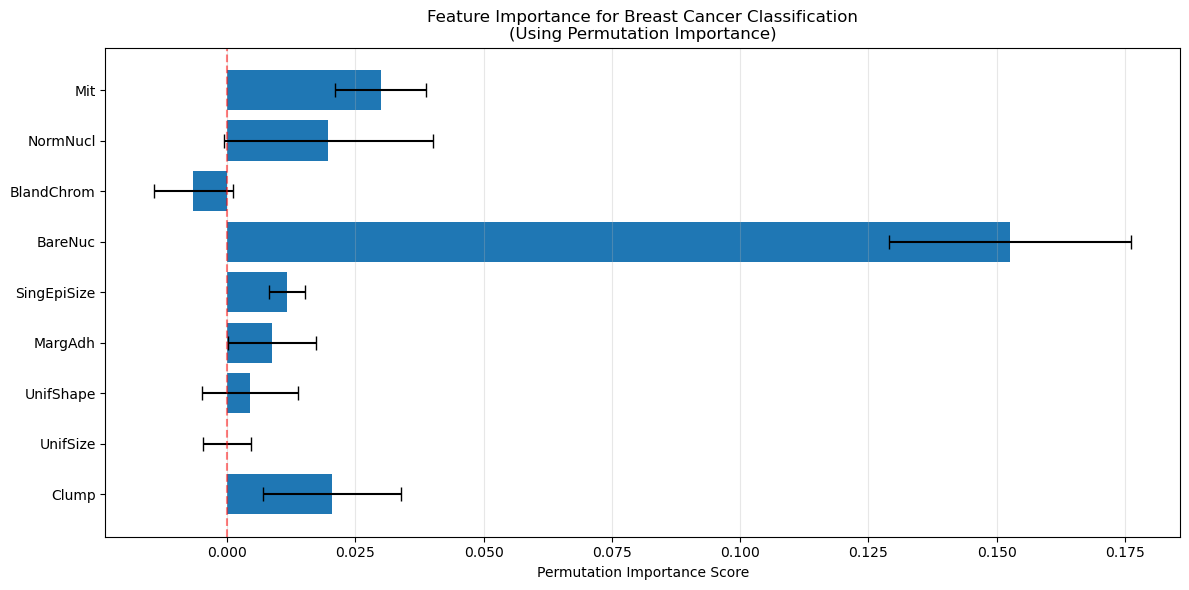

\n============================================================
FEATURE IMPORTANCE RANKING
BareNuc         : 0.1526 ± 0.0236
Mit             : 0.0299 ± 0.0089
Clump           : 0.0204 ± 0.0134
NormNucl        : 0.0197 ± 0.0204
SingEpiSize     : 0.0117 ± 0.0036
MargAdh         : 0.0088 ± 0.0085
UnifShape       : 0.0044 ± 0.0093
UnifSize        : 0.0000 ± 0.0046
BlandChrom      : -0.0066 ± 0.0076


In [44]:
# Plot feature importance
plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(result.importances_mean)), 
                result.importances_mean, 
                xerr=result.importances_std,
                capsize=5)

plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Permutation Importance Score')
plt.title('Feature Importance for Breast Cancer Classification\n(Using Permutation Importance)')
plt.grid(True, alpha=0.3, axis='x')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print detailed results
print("\\n" + "="*60)
print("FEATURE IMPORTANCE RANKING")
print("="*60)
for i in np.argsort(result.importances_mean)[::-1]:
    print(f"{X.columns[i]:15} : {result.importances_mean[i]:.4f} ± {result.importances_std[i]:.4f}")

The SVM model has learned that bare nuclei presence is the single most important feature for predicting breast cancer malignancy. This aligns with medical literature where bare nuclei are strong indicators of malignancy. The model is smartly focusing on what matters most clinically!

In [45]:
import joblib

In [46]:
# Save model and scaler
joblib.dump(svm_model, "breast_cancer_svm_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']